In [1]:
#import need
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import math
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [2]:
data_climate = pd.read_csv('data_fortaleza-CE.csv')
data_climate.head()

codigo_estacao        data  hora  temp_inst  temp_max  temp_min  umid_inst  \
0           A305  12/05/2019    13       30.4      30.4      29.0         67   
1           A305  12/05/2019    11       28.4       NaN       NaN         76   
2           A305  12/05/2019    14       30.9      31.0      29.6         58   
3           A305  12/05/2019    12       29.0      29.7      28.3         72   
4           A305  12/05/2019    15       32.1      32.3      30.9         55   

   umid_max  umid_min  pto_orvalho_inst  pto_orvalho_max  pto_orvalho_min  \
0      73.0      64.0              23.5             24.1             22.2   
1       NaN       NaN              23.7              NaN              NaN   
2      67.0      58.0              21.7             23.4             21.7   
3      76.0      68.0              23.5             24.3             22.8   
4      60.0      53.0              22.1             23.4             21.2   

   pressao  pressao_max  pressao_min  vento_direcao  vento_vel   vento_rajada  \
0   1009.7       1010.1       1009.7            2.9        140            7.6   
1   1009.6          NaN          NaN            2.3        152            NaN   
2   1009.1       1009.7       1009.1            3.0        139            8.3   
3   1010.0       1010.0       1009.6            2.8        137            6.7   
4   1008.3       1009.1       1008.2            2.8        148            8.2   

   radiacao  precipitacao  
0    1524.0           0.6  
1     171.6           0.0  
2    1643.0           0.0  
3    1319.0           0.0  
4    2150.0           0.0

In [3]:
#Correting column's names
data_climate.columns = ['codigo_estacao','data','hora','temp_inst','temp_max','temp_min','umid_inst','umid_max','umid_min','pto_orvalho_inst','pto_orvalho_max','pto_orvalho_min','pressao','pressao_max','pressao_min','vento_direcao','vento_vel','vento_rajada','radiacao','precipitacao']
data_climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Data columns (total 20 columns):
codigo_estacao      1905 non-null object
data                1905 non-null object
hora                1905 non-null int64
temp_inst           1905 non-null float64
temp_max            1904 non-null float64
temp_min            1904 non-null float64
umid_inst           1905 non-null int64
umid_max            1904 non-null float64
umid_min            1904 non-null float64
pto_orvalho_inst    1905 non-null float64
pto_orvalho_max     1904 non-null float64
pto_orvalho_min     1904 non-null float64
pressao             1905 non-null float64
pressao_max         1904 non-null float64
pressao_min         1904 non-null float64
vento_direcao       1905 non-null float64
vento_vel           1905 non-null int64
vento_rajada        1904 non-null float64
radiacao            1905 non-null float64
precipitacao        1905 non-null float64
dtypes: float64(15), int64(3), object(2)
memory usage: 297.8+

0       1.4
1       NaN
2       1.4
3       1.4
4       1.4
       ... 
1900    0.8
1901    1.7
1902    0.4
1903    0.7
1904    0.4
Length: 1905, dtype: float64


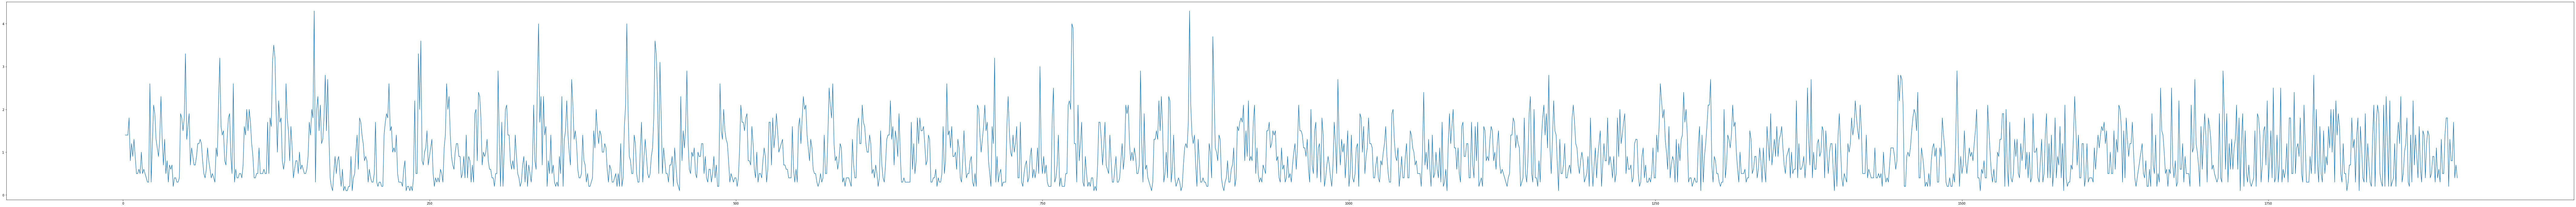

In [4]:
# dif into temp_max and temp_min
diff_temp = data_climate.temp_max - data_climate.temp_min
plt.rcParams['figure.figsize'] = (152,12)
plt.plot(diff_temp)
print(diff_temp)

0       9.0
1       NaN
2       9.0
3       8.0
4       7.0
       ... 
1900    8.0
1901    8.0
1902    2.0
1903    4.0
1904    2.0
Length: 1905, dtype: float64


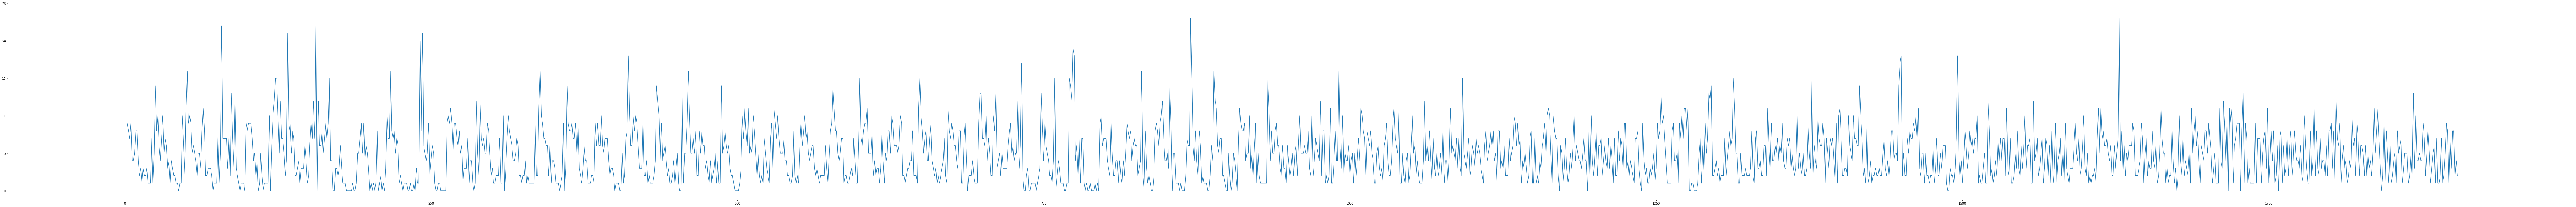

In [5]:
# diff between umid_max umid_min
diff_umid = data_climate.umid_max - data_climate.umid_min
print(diff_umid)
plt.plot(diff_umid)

0       9.0
1       NaN
2       9.0
3       8.0
4       7.0
       ... 
1900    8.0
1901    8.0
1902    2.0
1903    4.0
1904    2.0
Length: 1905, dtype: float64


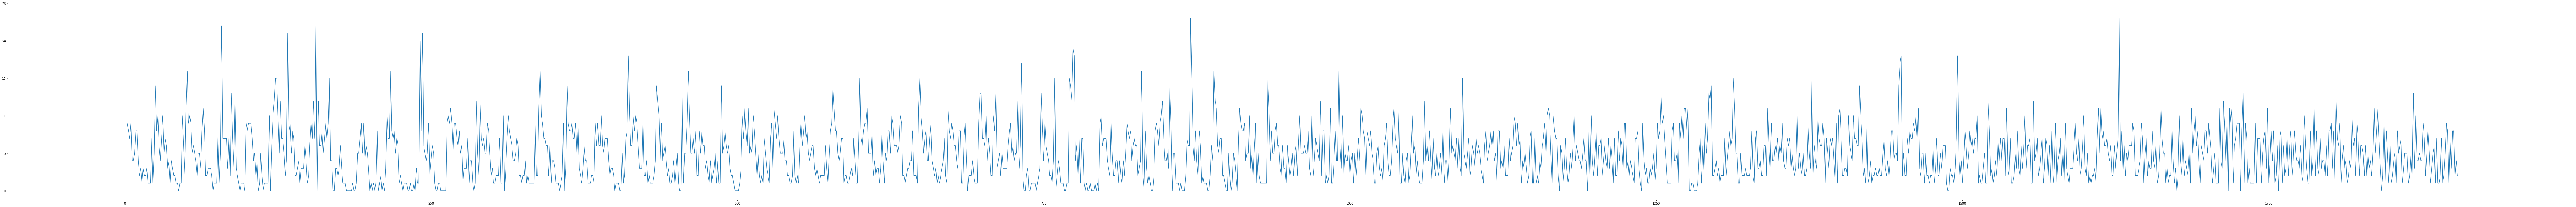

In [6]:
# diff betwenn dew_max and dew_min
diff_dew = data_climate.umid_max - data_climate.umid_min
print(diff_dew)
plt.plot(diff_dew)

0       0.4
1       NaN
2       0.6
3       0.4
4       0.9
       ... 
1900    0.8
1901    0.9
1902    0.3
1903    0.8
1904    0.7
Length: 1905, dtype: float64


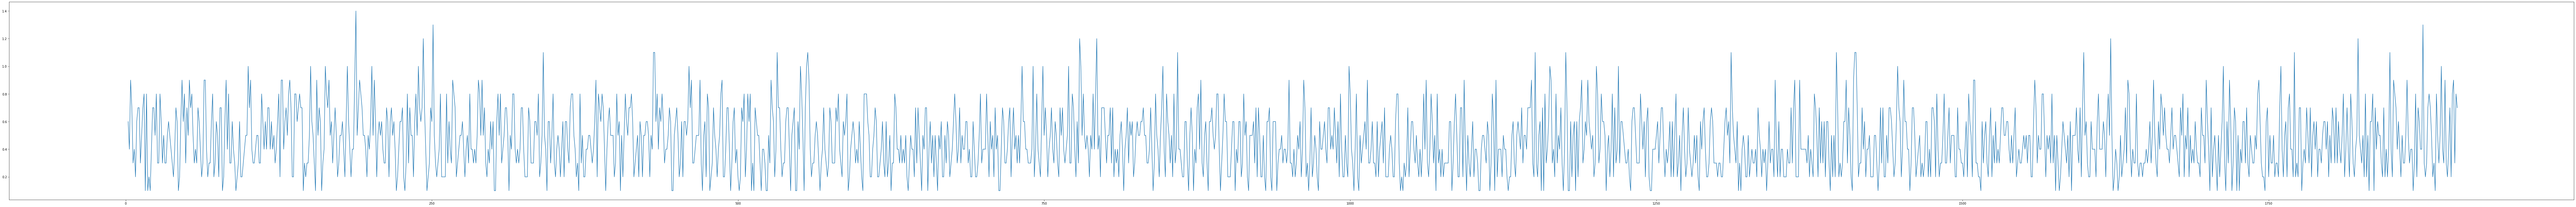

In [7]:
#diff between pressue_max and pressure_min
diff_pressure = data_climate.pressao_max - data_climate.pressao_min
print(diff_pressure)
plt.plot(diff_pressure)

0       132.4
1         NaN
2       130.7
3       130.3
4       139.8
        ...  
1900    141.3
1901    139.6
1902    149.9
1903    103.3
1904    100.3
Length: 1905, dtype: float64


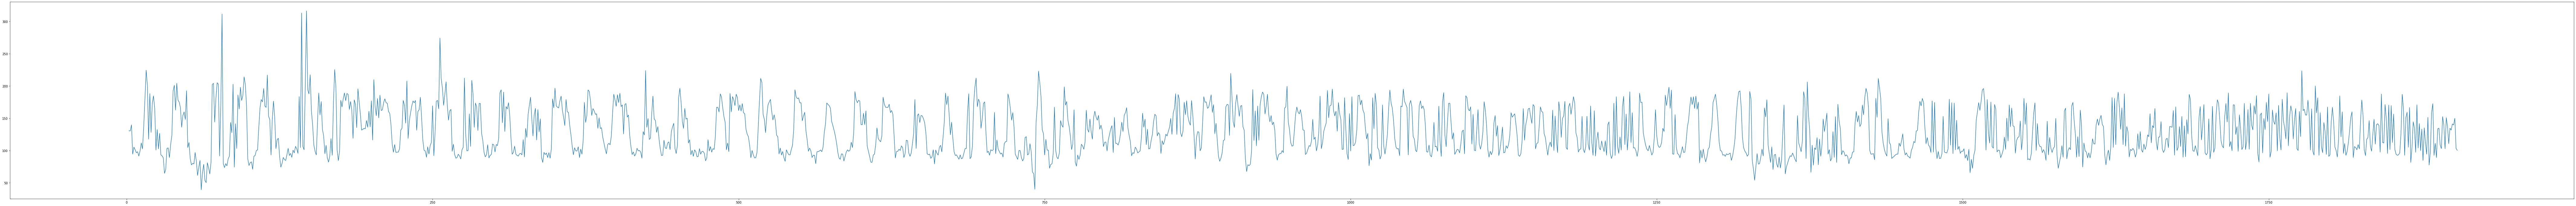

In [8]:
# diff between wind_direction and wind_guest
diff_wind = data_climate.vento_vel - data_climate.vento_rajada
print(diff_wind)
plt.plot(diff_wind)

In [9]:
new_dataset = pd.DataFrame(data_climate[['hora','temp_inst','umid_inst','pto_orvalho_inst','pressao','vento_rajada','radiacao','precipitacao','vento_vel']])
new_dataset.head()

hora  temp_inst  umid_inst  pto_orvalho_inst  pressao  vento_rajada  \
0    13       30.4         67              23.5   1009.7           7.6   
1    11       28.4         76              23.7   1009.6           NaN   
2    14       30.9         58              21.7   1009.1           8.3   
3    12       29.0         72              23.5   1010.0           6.7   
4    15       32.1         55              22.1   1008.3           8.2   

   radiacao  precipitacao  vento_vel  
0    1524.0           0.6        140  
1     171.6           0.0        152  
2    1643.0           0.0        139  
3    1319.0           0.0        137  
4    2150.0           0.0        148

In [10]:
new_dataset['diff_temp'] = diff_temp
new_dataset['diff_umid'] = diff_umid
new_dataset['diff_dew'] = diff_dew
new_dataset['diff_pressure'] = diff_pressure
new_dataset['diff_wind'] = diff_wind
new_dataset.head()

hora  temp_inst  umid_inst  pto_orvalho_inst  pressao  vento_rajada  \
0    13       30.4         67              23.5   1009.7           7.6   
1    11       28.4         76              23.7   1009.6           NaN   
2    14       30.9         58              21.7   1009.1           8.3   
3    12       29.0         72              23.5   1010.0           6.7   
4    15       32.1         55              22.1   1008.3           8.2   

   radiacao  precipitacao  vento_vel  diff_temp  diff_umid  diff_dew  \
0    1524.0           0.6        140        1.4        9.0       9.0   
1     171.6           0.0        152        NaN        NaN       NaN   
2    1643.0           0.0        139        1.4        9.0       9.0   
3    1319.0           0.0        137        1.4        8.0       8.0   
4    2150.0           0.0        148        1.4        7.0       7.0   

   diff_pressure  diff_wind  
0            0.4      132.4  
1            NaN        NaN  
2            0.6      130.7  
3            0.4      130.3  
4            0.9      139.8

In [11]:
#To analyse correlation pearson
new_dataset.corr()

hora  temp_inst  umid_inst  pto_orvalho_inst   pressao  \
hora              1.000000   0.516744  -0.497390         -0.182804 -0.268614   
temp_inst         0.516744   1.000000  -0.890714         -0.253629 -0.182282   
umid_inst        -0.497390  -0.890714   1.000000          0.656368 -0.007512   
pto_orvalho_inst -0.182804  -0.253629   0.656368          1.000000 -0.288963   
pressao          -0.268614  -0.182282  -0.007512         -0.288963  1.000000   
vento_rajada      0.469467   0.674963  -0.753257         -0.475109  0.013130   
radiacao          0.440019   0.859550  -0.852084         -0.439331 -0.062353   
precipitacao     -0.078429  -0.191465   0.223124          0.119493  0.002426   
vento_vel        -0.418446  -0.533809   0.473500          0.070497  0.136827   
diff_temp         0.335550   0.501309  -0.467172         -0.156690  0.047265   
diff_umid         0.406182   0.560120  -0.553448         -0.217951  0.025360   
diff_dew          0.406182   0.560120  -0.553448         -0.217951  0.025360   
diff_pressure     0.188071   0.206606  -0.150731         -0.019136 -0.068442   
diff_wind        -0.436360  -0.562429   0.509800          0.101778  0.130847   

                  vento_rajada  radiacao  precipitacao  vento_vel  diff_temp  \
hora                  0.469467  0.440019     -0.078429  -0.418446   0.335550   
temp_inst             0.674963  0.859550     -0.191465  -0.533809   0.501309   
umid_inst            -0.753257 -0.852084      0.223124   0.473500  -0.467172   
pto_orvalho_inst     -0.475109 -0.439331      0.119493   0.070497  -0.156690   
pressao               0.013130 -0.062353      0.002426   0.136827   0.047265   
vento_rajada          1.000000  0.682048      0.039845  -0.502231   0.442347   
radiacao              0.682048  1.000000     -0.102401  -0.271172   0.597435   
precipitacao          0.039845 -0.102401      1.000000   0.049285   0.009706   
vento_vel            -0.502231 -0.271172      0.049285   1.000000  -0.095041   
diff_temp             0.442347  0.597435      0.009706  -0.095041   1.000000   
diff_umid             0.503400  0.592599     -0.088718  -0.214634   0.839843   
diff_dew              0.503400  0.592599     -0.088718  -0.214634   0.839843   
diff_pressure         0.170259  0.244444      0.140140  -0.075015   0.180225   
diff_wind            -0.555240 -0.309952      0.044572   0.998049  -0.123347   

                  diff_umid  diff_dew  diff_pressure  diff_wind  
hora               0.406182  0.406182       0.188071  -0.436360  
temp_inst          0.560120  0.560120       0.206606  -0.562429  
umid_inst         -0.553448 -0.553448      -0.150731   0.509800  
pto_orvalho_inst  -0.217951 -0.217951      -0.019136   0.101778  
pressao            0.025360  0.025360      -0.068442   0.130847  
vento_rajada       0.503400  0.503400       0.170259  -0.555240  
radiacao           0.592599  0.592599       0.244444  -0.309952  
precipitacao      -0.088718 -0.088718       0.140140   0.044572  
vento_vel         -0.214634 -0.214634      -0.075015   0.998049  
diff_temp          0.839843  0.839843       0.180225  -0.123347  
diff_umid          1.000000  1.000000       0.145007  -0.242778  
diff_dew           1.000000  1.000000       0.145007  -0.242778  
diff_pressure      0.145007  0.145007       1.000000  -0.084441  
diff_wind         -0.242778 -0.242778      -0.084441   1.000000

In [12]:
new_dataset.corr()["vento_vel"]

hora               -0.418446
temp_inst          -0.533809
umid_inst           0.473500
pto_orvalho_inst    0.070497
pressao             0.136827
vento_rajada       -0.502231
radiacao           -0.271172
precipitacao        0.049285
vento_vel           1.000000
diff_temp          -0.095041
diff_umid          -0.214634
diff_dew           -0.214634
diff_pressure      -0.075015
diff_wind           0.998049
Name: vento_vel, dtype: float64

# Divide train, test and validation datasets

In [13]:
len_dataset = len(new_dataset)

set_validation = new_dataset[:381]
set_test_train = new_dataset[381:]

x = set_test_train[['hora','temp_inst','umid_inst','pto_orvalho_inst','pressao','vento_rajada','radiacao','precipitacao','diff_temp','diff_umid','diff_dew','diff_pressure','diff_wind']]
y = set_test_train[['vento_vel']]

x_validation = set_validation[['hora','temp_inst','umid_inst','pto_orvalho_inst','pressao','vento_rajada','radiacao','precipitacao','diff_temp','diff_umid','diff_dew','diff_pressure','diff_wind']]
y_validation = set_validation[['vento_vel']]

print('X:{}'.format(x.shape))
print('Y:{}'.format(y.shape))
print('x_validation:{}'.format(x_validation.shape))
print('y_validation:{}'.format(y_validation.shape))



X:(1524, 13)
Y:(1524, 1)
x_validation:(381, 13)
y_validation:(381, 1)


In [14]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2)

#  Apllying MLPRegressor

In [15]:
MLP_reg = MLPRegressor(hidden_layer_sizes = 1500, activation='tanh',
                      verbose=True, warm_start=True,
                      max_iter = 400)
MLP_reg.fit(train_x,train_y)#Kernel default : RBF 
predicts = MLP_reg.predict(test_x)


/usr/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 8631.83449530
Iteration 2, loss = 7017.53488646
Iteration 3, loss = 5753.66784378
Iteration 4, loss = 4710.14151323
Iteration 5, loss = 3808.79310317
Iteration 6, loss = 3057.75701497
Iteration 7, loss = 2456.78143672
Iteration 8, loss = 1962.97514534
Iteration 9, loss = 1569.30842857
Iteration 10, loss = 1271.21337914
Iteration 11, loss = 1041.76564998
Iteration 12, loss = 864.82326268
Iteration 13, loss = 741.31029810
Iteration 14, loss = 655.67370807
Iteration 15, loss = 592.59217231
Iteration 16, loss = 544.30805304
Iteration 17, loss = 508.78833255
Iteration 18, loss = 479.83128494
Iteration 19, loss = 457.91094172
Iteration 20, loss = 439.35254741
Iteration 21, loss = 426.03400524
Iteration 22, loss = 406.95627477
Iteration 23, loss = 388.49671374
Iteration 24, loss = 368.48048582
Iteration 25, loss = 343.82097689
Iteration 26, loss = 319.32001507
Iteration 27, loss = 297.72795431
Iteration 28, loss = 279.00795507
Iteration 29, loss = 258.17339495
Iteration 30

Iteration 247, loss = 4.04946484
Iteration 248, loss = 4.04137394
Iteration 249, loss = 3.93379806
Iteration 250, loss = 4.03107764
Iteration 251, loss = 4.05377073
Iteration 252, loss = 3.97848713
Iteration 253, loss = 3.96808441
Iteration 254, loss = 3.86300122
Iteration 255, loss = 3.79178811
Iteration 256, loss = 3.88766397
Iteration 257, loss = 3.86730601
Iteration 258, loss = 3.72719950
Iteration 259, loss = 3.81893524
Iteration 260, loss = 4.23834366
Iteration 261, loss = 4.17335227
Iteration 262, loss = 4.05015787
Iteration 263, loss = 3.88461669
Iteration 264, loss = 3.83348197
Iteration 265, loss = 4.59167447
Iteration 266, loss = 6.60713214
Iteration 267, loss = 5.90601381
Iteration 268, loss = 5.08484695
Iteration 269, loss = 5.15757251
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [16]:
predicts

array([169.83293209, 141.02014103, 113.82609861, 133.10410331,
       173.14520552,  98.77061273, 171.3710402 , 109.66240117,
       144.33205588, 175.89177867, 172.32251585, 135.09282515,
       169.18459098, 111.56644969, 195.81997849, 109.63608845,
       151.85598185, 184.42357912, 174.50237007, 146.2957096 ,
        96.30217652, 154.91515461, 145.35043198, 103.20154002,
       127.5065149 , 101.50375849, 175.49364488, 174.54108921,
       159.37106505, 166.08973608, 180.75246283, 141.57044558,
       158.98962317, 113.93275086, 109.3633701 , 108.26015246,
       111.42702056, 104.65258657, 157.44225007,  99.16687422,
       100.13114146, 162.6515956 , 146.90993103, 187.6658357 ,
       146.43760447, 133.22599885, 104.80074314, 112.59285865,
       112.14813291, 148.75542043, 151.63998669, 156.59091556,
       176.93033637,  99.38806252, 159.00238676, 156.73318366,
       160.37608223,  98.27096095, 102.41439287, 175.38616006,
       172.20157739, 173.37247992, 127.2194057 , 115.07

In [17]:
test_y

vento_vel
931         170
852         141
773         116
749         134
1196        175
...         ...
987         159
648         149
1646        109
515         101
1549        126

[305 rows x 1 columns]

In [18]:
predicts_rounded = predicts.round()
predicts_rounded

array([170., 141., 114., 133., 173.,  99., 171., 110., 144., 176., 172.,
       135., 169., 112., 196., 110., 152., 184., 175., 146.,  96., 155.,
       145., 103., 128., 102., 175., 175., 159., 166., 181., 142., 159.,
       114., 109., 108., 111., 105., 157.,  99., 100., 163., 147., 188.,
       146., 133., 105., 113., 112., 149., 152., 157., 177.,  99., 159.,
       157., 160.,  98., 102., 175., 172., 173., 127., 115.,  86., 167.,
       109., 101., 109., 125., 130., 155., 100., 122.,  95., 106., 139.,
        99., 170., 160.,  86., 127., 151., 104., 158., 105., 160., 176.,
       101., 139., 172., 108., 144., 113., 101.,  95., 102.,  95.,  92.,
       168., 176., 173., 133., 108., 119., 181., 112., 112., 190.,  91.,
       126., 115.,  90., 106., 106., 101., 171., 158., 100., 113., 169.,
       163., 163., 169., 144., 160., 124., 177., 142.,  91., 117.,  95.,
        92.,  93., 158., 108., 105., 128., 121., 119., 169., 102., 107.,
        97., 189., 165., 157., 116.,  88., 197., 10

In [19]:
#acc = accuracy_score(test_y,predicts)
rmse = math.sqrt(mean_squared_error(test_y,predicts))
score_r2 = r2_score(test_y,predicts)

#print(acc)
print(rmse)
print(score_r2)

2.2338639450923923
0.9950958110127085


In [20]:
#acc = accuracy_score(test_y,predicts)
rmse = math.sqrt(mean_squared_error(test_y,predicts_rounded))
score_r2 = r2_score(test_y,predicts_rounded)

#print(acc)
print(rmse)
print(score_r2)

2.256502443758598
0.9949959069473755


In [61]:
test_y.head()
test_y.loc[0,1:305]

KeyError: 0

In [40]:
line= [i for i in range(1,len(test_y)+1)]


[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [44]:
plot_test_predict = pd.DataFrame()
plot_test_predict['linha'] = line
plot_test_predict['vento_vel_pred'] = predicts
plot_test_predict['vento_vel'] = test_y
plot_test_predict

linha  vento_vel_pred  vento_vel
0        1      169.832932        NaN
1        2      141.020141        NaN
2        3      113.826099        NaN
3        4      133.104103        NaN
4        5      173.145206        NaN
..     ...             ...        ...
300    301      158.596161        NaN
301    302      146.705141        NaN
302    303      108.186728        NaN
303    304      100.258374        NaN
304    305      126.610574        NaN

[305 rows x 3 columns]